In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100

Preparing for a Measured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.109 Seconds
Building LP ...
	Done. Took 0.108 Seconds
Building M ...
	Done. Took 0.236 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 0.274
	Done. Took 1.559 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): 0.197*(0.011)^t + 2.742*(-0.001)^t + -0.143*(0.001)^t + -0.037*(0.013)^t + -2.758232 * delta(t,0)
		RMSE = 0.000
		Matlab: [ 0.2   0.01  2.74 -0.   -0.14  0.   -0.04  0.01]
	Done. Took 52.678 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): -0.816*(0.550)^t + -0.111*(-0.600)^t + 0.510*(0.750)^t + 0.000*(-0.358)^t + 0.416970 * delta(t,0)
		RMSE = 0.000
		Matlab: [-0.82  0.55 -0.11 -0.6   0.51  0.75  0.   -0.36]
	Done. Took 52.666 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1): -0.117*(0.000)^t + 0.086*(-0.351)^t + -0.028*(-0.000)^t + 0.200*(-0.350)^t + -0.140705 *

{0: {1: array([ 0.2 ,  0.01,  2.74, -0.  , -0.14,  0.  , -0.04,  0.01]),
  2: array([-0.82,  0.55, -0.11, -0.6 ,  0.51,  0.75,  0.  , -0.36])},
 1: {0: array([-0.12,  0.  ,  0.09, -0.35, -0.03, -0.  ,  0.2 , -0.35]),
  2: array([-4.8 ,  0.01,  2.03,  0.01,  2.39, -0.04, -3.4 , -0.04])},
 2: {0: array([-2.73, -0.  ,  0.92, -0.03, -0.89, -0.02, -1.03, -0.  ]),
  1: array([-8.91,  0.85, -0.3 ,  0.08,  1.15,  0.01,  8.04,  0.95])}}

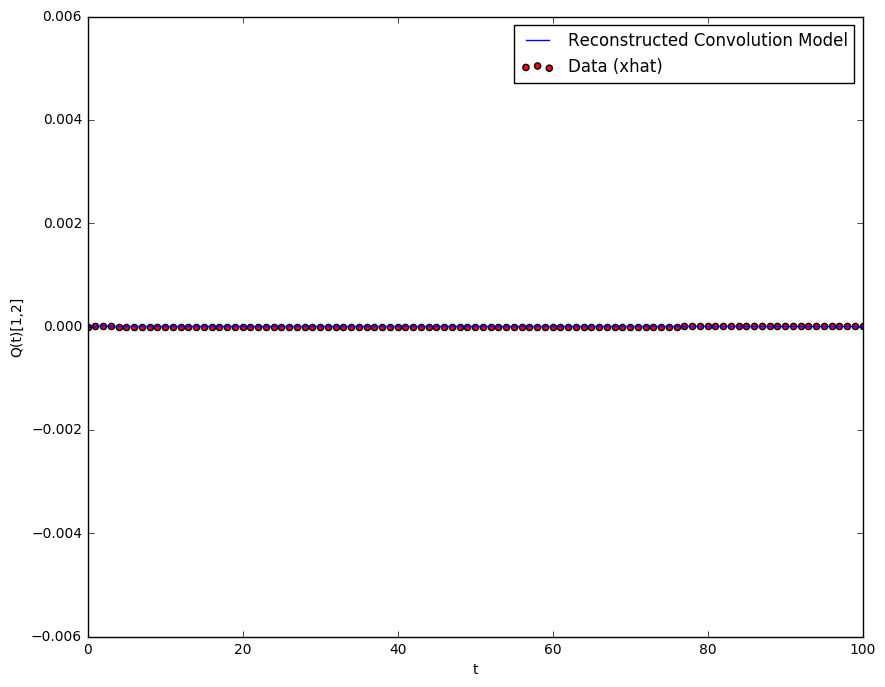

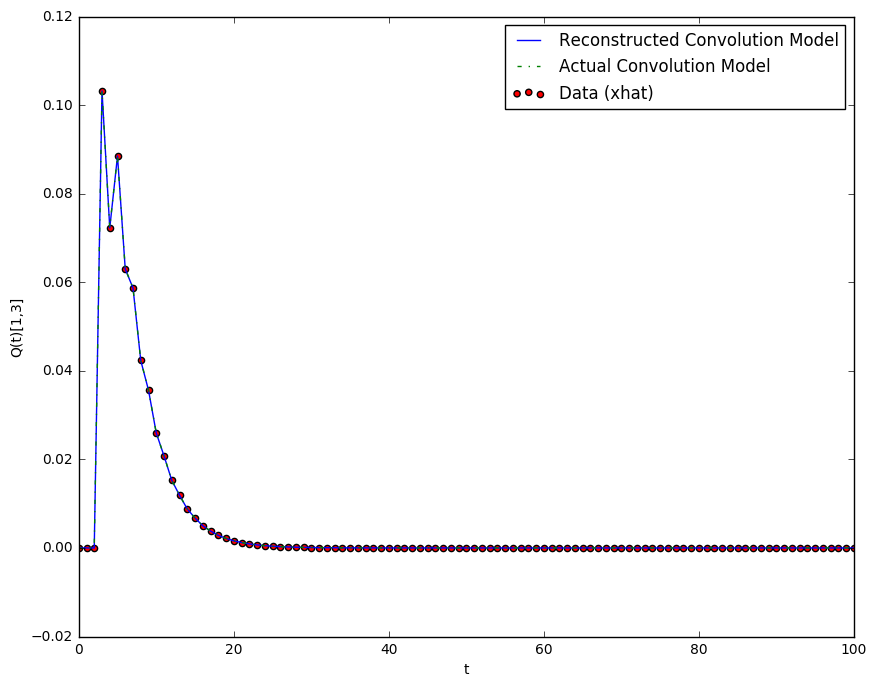

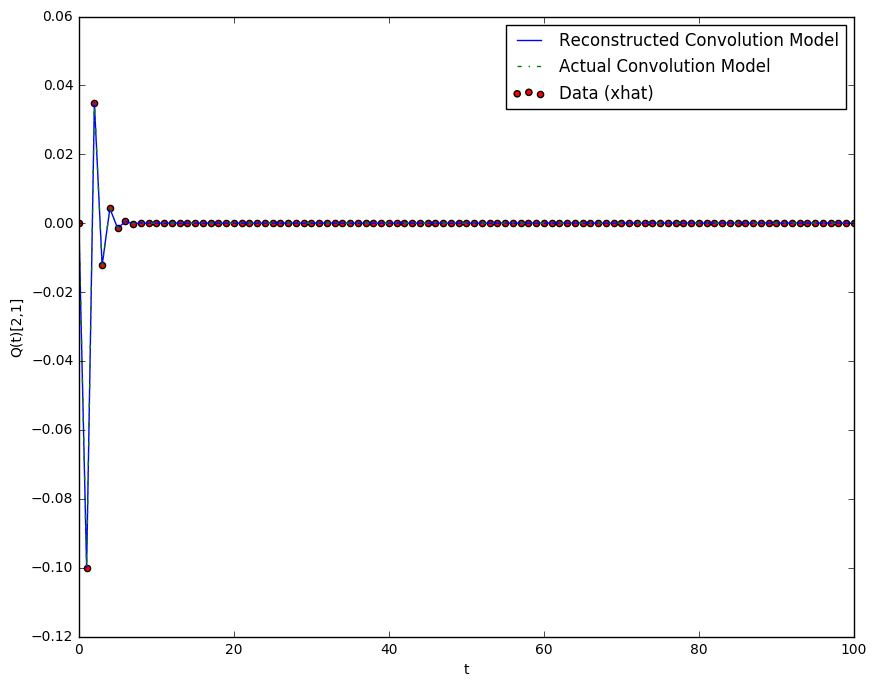

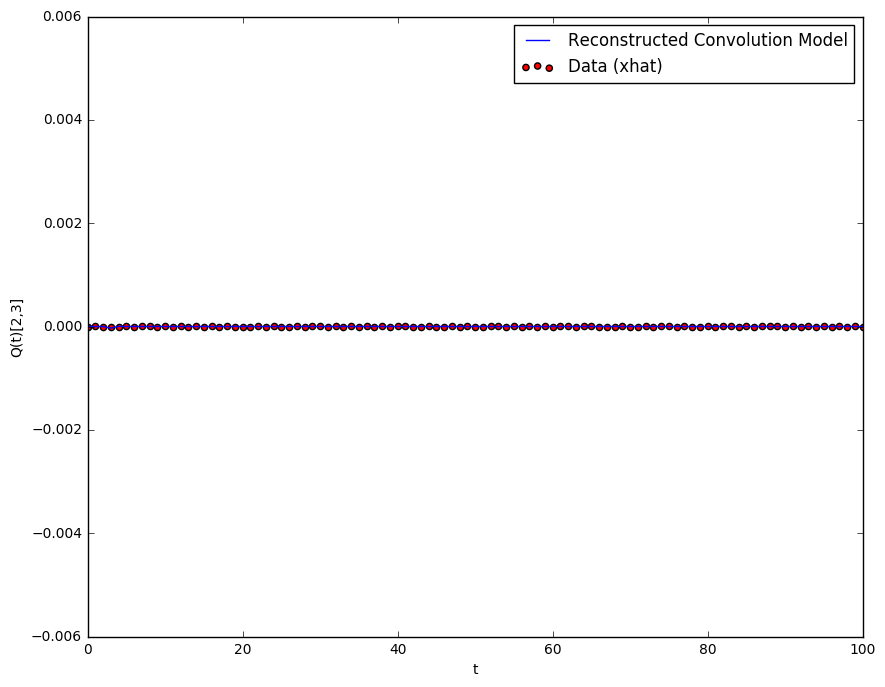

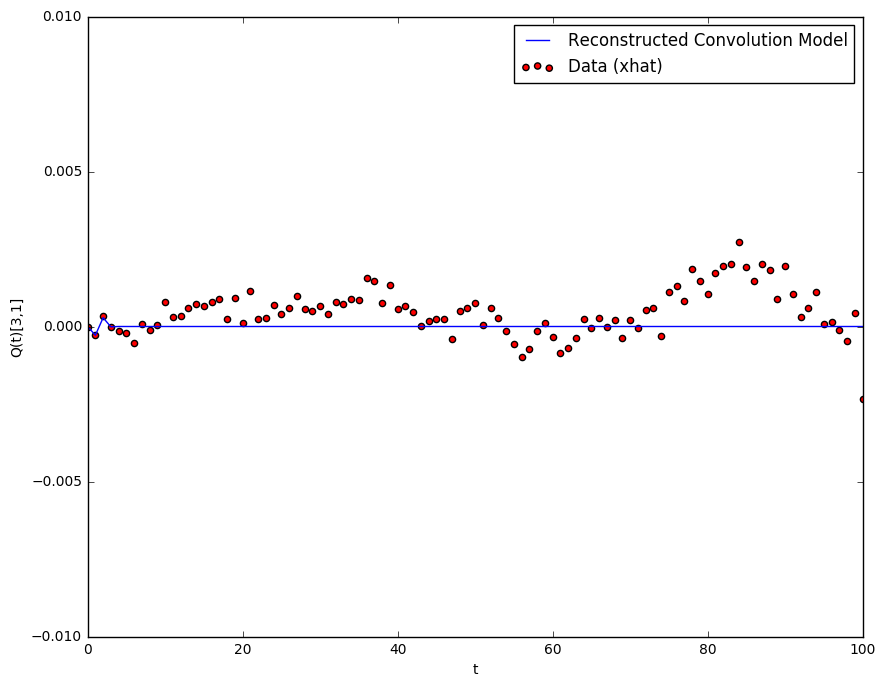

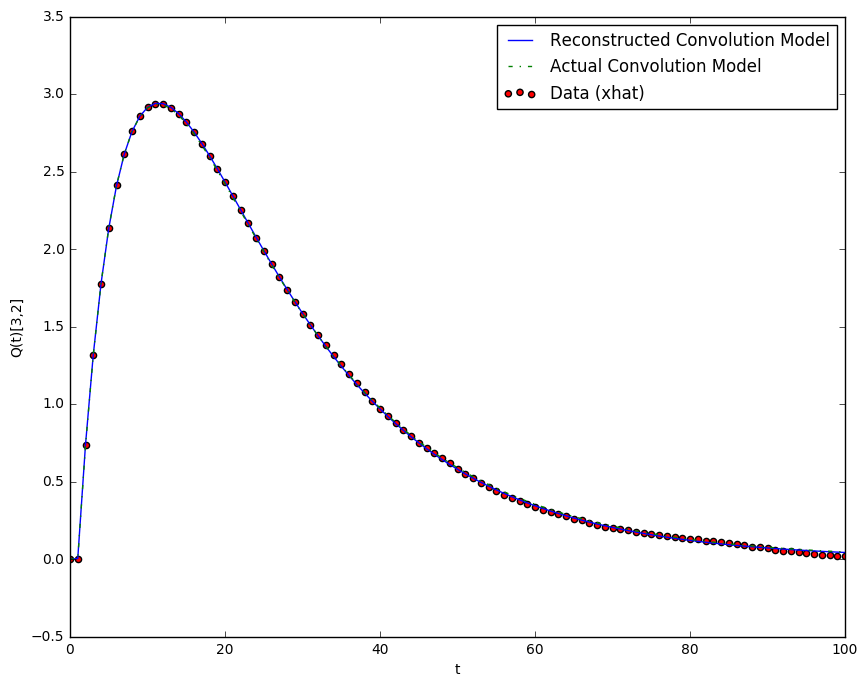

In [2]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=10, order=4, real_params=real_params, robust=False)
recon.measured(y, u, plot=True)  #, ij=(1,3))